# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
max_temp = []
wind_speed = []

units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" 
#query_url

In [10]:
index = 0
for city in cities:
    print(f"Processing Record {index} {city}")

    # Get one of the posts
    response = requests.get(query_url + city).json()
    #print(response)

    try:
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
    except:
        print("Skipping. Value not found.")
        pass
    index += 1
    #if index == 1:
        #break

Processing Record 0 taolanaro
Skipping. Value not found.
Processing Record 1 nizhneyansk
Skipping. Value not found.
Processing Record 2 rikitea
Processing Record 3 ushuaia
Processing Record 4 pasan
Processing Record 5 bredasdorp
Processing Record 6 busselton
Processing Record 7 nanortalik
Processing Record 8 nome
Processing Record 9 hermanus
Processing Record 10 margate
Processing Record 11 nsanje
Processing Record 12 cayenne
Processing Record 13 karkaralinsk
Skipping. Value not found.
Processing Record 14 luderitz
Processing Record 15 mataura
Processing Record 16 savannakhet
Processing Record 17 goderich
Processing Record 18 chardara
Processing Record 19 airai
Processing Record 20 hithadhoo
Processing Record 21 husavik
Processing Record 22 clyde river
Processing Record 23 kapaa
Processing Record 24 punta arenas
Processing Record 25 upernavik
Processing Record 26 buin
Processing Record 27 saint-philippe
Processing Record 28 sitka
Processing Record 29 molina
Processing Record 30 belushy

Processing Record 244 gornyak
Processing Record 245 tiksi
Processing Record 246 ilulissat
Processing Record 247 quatre cocos
Processing Record 248 kangaatsiaq
Processing Record 249 alofi
Processing Record 250 buenos aires
Processing Record 251 rundu
Processing Record 252 nabire
Processing Record 253 bani walid
Processing Record 254 aswan
Processing Record 255 lahij
Processing Record 256 port hardy
Processing Record 257 isla mujeres
Processing Record 258 mujiayingzi
Processing Record 259 tezu
Processing Record 260 gunjur
Processing Record 261 moratuwa
Processing Record 262 tsimlyansk
Processing Record 263 hamilton
Processing Record 264 faanui
Processing Record 265 betera
Processing Record 266 navalmoral de la mata
Processing Record 267 kaz
Processing Record 268 aguimes
Processing Record 269 katangli
Processing Record 270 halifax
Processing Record 271 tabas
Processing Record 272 diebougou
Processing Record 273 kruisfontein
Processing Record 274 longyearbyen
Processing Record 275 bagdarin

Processing Record 495 salina cruz
Processing Record 496 jieshi
Processing Record 497 pitimbu
Processing Record 498 dasoguz
Processing Record 499 koumac
Processing Record 500 manokwari
Processing Record 501 meadow lake
Processing Record 502 herborn
Processing Record 503 hami
Processing Record 504 kisanga
Processing Record 505 alice springs
Processing Record 506 san quintin
Processing Record 507 coahuayana
Processing Record 508 mlonggo
Processing Record 509 chumikan
Processing Record 510 hun
Processing Record 511 samarai
Processing Record 512 teshie
Processing Record 513 nikolayevskaya
Processing Record 514 tupaciguara
Processing Record 515 kutum
Processing Record 516 tazovskiy
Processing Record 517 nioro
Processing Record 518 mushie
Processing Record 519 filingue
Processing Record 520 baruun-urt
Processing Record 521 dali
Processing Record 522 del rio
Processing Record 523 sao gabriel da cachoeira
Processing Record 524 faya
Processing Record 525 paro
Processing Record 526 praia
Processi

In [11]:
print(len(city_name), len(cloudiness), len(country), len(date), len(humidity), len(lat), len(lng), len(temp), len(max_temp), len(wind_speed))

551 551 551 551 551 551 551 551 551 551


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_dict = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Temperature": temp,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0         Rikitea          94      PF  1580788956        77 -23.12 -134.97   
1         Ushuaia          75      AR  1580788956        66 -54.80  -68.30   
2           Pasan          38      IN  1580788956        45  22.85   82.20   
3      Bredasdorp          92      ZA  1580788956        88 -34.53   20.04   
4       Busselton          40      AU  1580788752        19 -33.65  115.33   
..            ...         ...     ...         ...       ...    ...     ...   
546         Kholm         100      RU  1580789051        88  59.27   32.85   
547       Iqaluit          90      CA  1580789052        77  63.75  -68.51   
548    Walvis Bay          33      NA  1580789052        93 -22.96   14.51   
549       Cherdyn         100      RU  1580789052        97  60.40   56.48   
550  Port-Cartier           5      CA  1580789052        72  50.03  -66.87   

     Temperature  Max Temp  Wind Speed  
0          78.84     78.84       11.99  
1          51.80     51.80       16.11  
2          58.91     58.91        5.91  
3          73.90     75.00        5.82  
4          86.59     90.00        9.42  
..           ...       ...         ...  
546        24.78     24.78       14.27  
547         5.00      5.00        3.36  
548        63.00     63.00        5.99  
549        28.00     28.00        6.06  
550        15.80     15.80        8.05  

[551 rows x 10 columns]

In [13]:
weather_data.to_csv("weatherpy.csv",index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

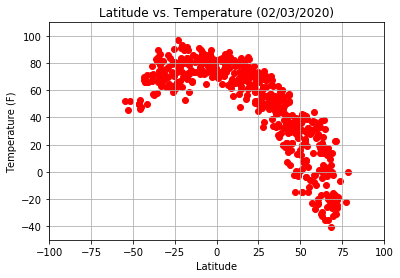

In [14]:
plt.scatter(weather_data["Lat"],
            weather_data["Temperature"],
            color="red")
plt.title("Latitude vs. Temperature" + " " + "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-50, 110])

plt.savefig("lat_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

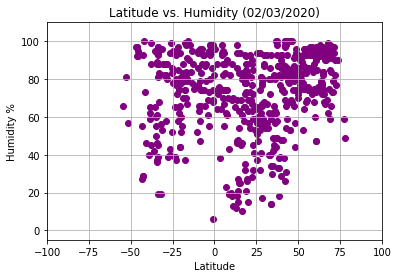

In [15]:
plt.scatter(weather_data["Lat"],
            weather_data["Humidity"],
            color="purple")
plt.title("Latitude vs. Humidity" + " " + "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-5, 110])

plt.savefig("lat_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

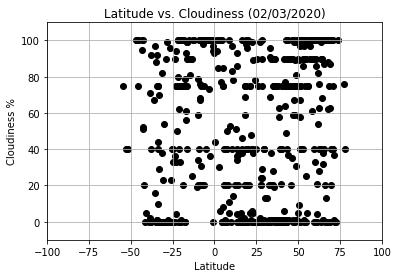

In [16]:
plt.scatter(weather_data["Lat"],
            weather_data["Cloudiness"],
            color="black")
plt.title("Latitude vs. Cloudiness" + " " + "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-10, 110])

plt.savefig("lat_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

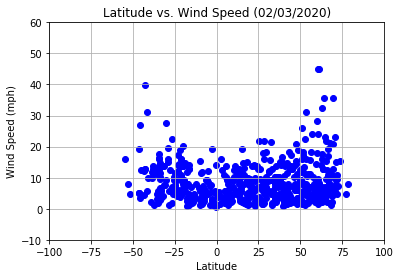

In [17]:
plt.scatter(weather_data["Lat"],
            weather_data["Wind Speed"],
            color="blue")
plt.title("Latitude vs. Wind Speed" + " " + "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-10, 60])

plt.savefig("lat_wind_speed.png")
plt.show()

## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots


In [19]:
# Create Northern and Southern Hemisphere DataFrames
north = weather_data.loc[(weather_data["Lat"] >= 0)]
south = weather_data.loc[(weather_data["Lat"] < 0)]
south

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0       Rikitea          94      PF  1580788956        77 -23.12 -134.97   
1       Ushuaia          75      AR  1580788956        66 -54.80  -68.30   
3    Bredasdorp          92      ZA  1580788956        88 -34.53   20.04   
4     Busselton          40      AU  1580788752        19 -33.65  115.33   
7      Hermanus           1      ZA  1580788957        94 -34.42   19.23   
..          ...         ...     ...         ...       ...    ...     ...   
535  Crib Point           0      AU  1580789050        59 -38.35  145.20   
537      Touros          40      BR  1580789050        88  -5.20  -35.46   
539     Pitanga           0      BR  1580788839        95 -24.76  -51.76   
540      Acarau          36      BR  1580789050        93  -2.89  -40.12   
548  Walvis Bay          33      NA  1580789052        93 -22.96   14.51   

     Temperature  Max Temp  Wind Speed  
0          78.84     78.84       11.99  
1          51.80     51.80       16.11  
3          73.90     75.00        5.82  
4          86.59     90.00        9.42  
7          70.36     75.00       16.26  
..           ...       ...         ...  
535        66.92     69.01       11.79  
537        78.80     78.80        4.70  
539        63.90     63.90        7.72  
540        75.54     75.54        2.89  
548        63.00     63.00        5.99  

[169 rows x 10 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8664111244475423


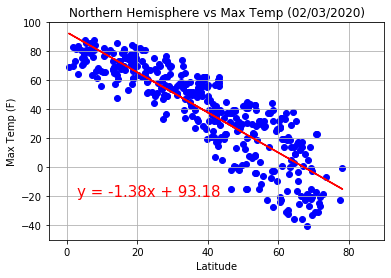

In [32]:
latitude = north["Lat"]
max_temp = north["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, max_temp)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude, max_temp, color="blue")
plt.plot(latitude, regress_values,"r-")

plt.annotate(line_eq,(3,-20),fontsize=15,color="red")
plt.title("Northern Hemisphere vs Max Temp" + " " + "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(True)
plt.ylim([-50, 100])
plt.xlim([-5, 90])
print(f"The r-squared is: {rvalue}")

#plt.savefig("north_max_temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5250157318239093


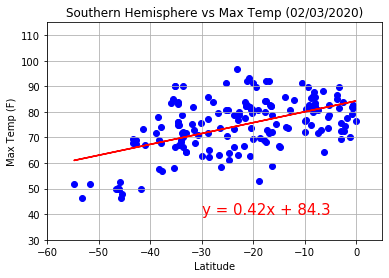

In [31]:
latitude = south["Lat"]
max_temp = south["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, max_temp)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude, max_temp, color="blue")
plt.plot(latitude, regress_values,"r-")

plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.title("Southern Hemisphere vs Max Temp" + " " + "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(True)
plt.ylim([30, 115])
plt.xlim([-60, 5])
print(f"The r-squared is: {rvalue}")

#plt.savefig("south_max_temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.37748253099725476


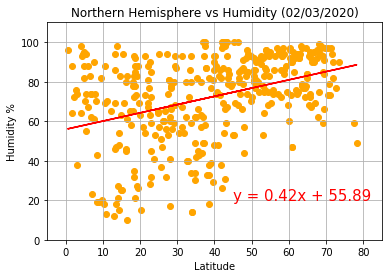

In [34]:
latitude = north["Lat"]
humidity = north["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude, humidity, color="orange")
plt.plot(latitude, regress_values,"r-")

plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.title("Northern Hemisphere vs Humidity" + " " + "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)
plt.ylim([0, 110])
plt.xlim([-5, 85])
print(f"The r-squared is: {rvalue}")

#plt.savefig("north_humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1526480506691333


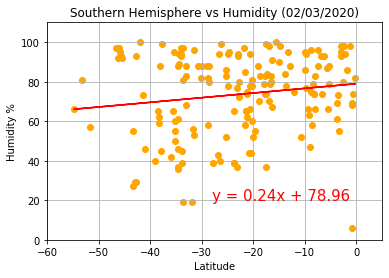

In [36]:
latitude = south["Lat"]
humidity = south["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude, humidity, color="orange")
plt.plot(latitude, regress_values,"r-")

plt.annotate(line_eq,(-28,20),fontsize=15,color="red")
plt.title("Southern Hemisphere vs Humidity" + " " + "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)
plt.ylim([0, 110])
plt.xlim([-60, 5])
print(f"The r-squared is: {rvalue}")

#plt.savefig("south_humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.29939058809215063


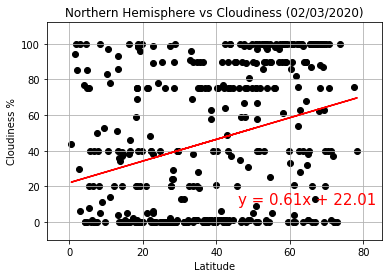

In [42]:
latitude = north["Lat"]
cloudiness = north["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, cloudiness)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude, cloudiness, color="black")
plt.plot(latitude, regress_values,"r-")

plt.annotate(line_eq,(46,10),fontsize=15,color="red")
plt.title("Northern Hemisphere vs Cloudiness" + " " + "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)
plt.ylim([-10, 112])
plt.xlim([-6, 85])
print(f"The r-squared is: {rvalue}")

#plt.savefig("north_cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.29125538467429357


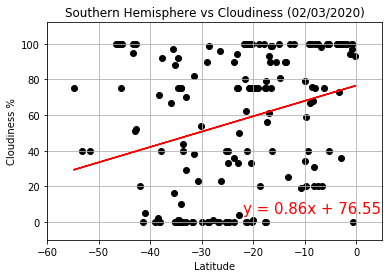

In [45]:
latitude = south["Lat"]
cloudiness = south["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, cloudiness)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude, cloudiness, color="black")
plt.plot(latitude, regress_values,"r-")

plt.annotate(line_eq,(-22,5),fontsize=15,color="red")
plt.title("Southern Hemisphere vs Cloudiness" + " " + "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)
plt.ylim([-10, 112])
plt.xlim([-60, 5])
print(f"The r-squared is: {rvalue}")

#plt.savefig("south_cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.23511816056190502


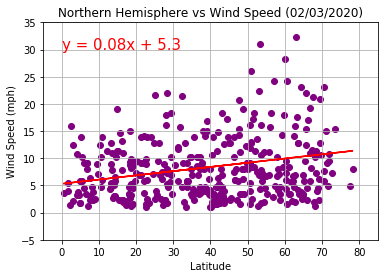

In [46]:
latitude = north["Lat"]
wind_speed = north["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, wind_speed)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude, wind_speed, color="purple")
plt.plot(latitude, regress_values,"r-")

plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.title("Northern Hemisphere vs Wind Speed" + " " + "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.ylim([-5, 35])
plt.xlim([-5, 85])
print(f"The r-squared is: {rvalue}")

#plt.savefig("north_wind_speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3386148405953168


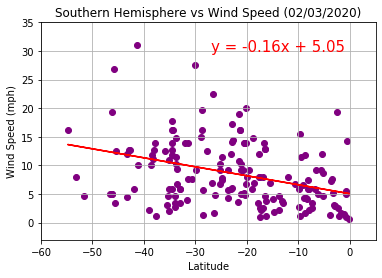

In [47]:
latitude = south["Lat"]
wind_speed = south["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, wind_speed)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude, wind_speed, color="purple")

plt.annotate(line_eq,(-27,30),fontsize=15,color="red")
plt.plot(latitude, regress_values,"r-")
plt.title("Southern Hemisphere vs Wind Speed" + " " + "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.ylim([-3, 35])
plt.xlim([-60, 5])
print(f"The r-squared is: {rvalue}")

#plt.savefig("south_wind_speed.png")
plt.show()